**AI Algorithm - Test 1**

Done by : Abraham Mathew (100829875)

In [9]:
#Load Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [59]:
#Load Dataset
data = pd.read_csv('loan_data_set.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [60]:
#Checking shape of Dataset
data.shape

(614, 13)

Data has 614 rows and 13 features including the id and the target variable

In [61]:
#Show Key Statistics
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The key metrics for numerical variables
Different columns are on different scale. might need to scale the data. There are missing values in Loan amount and credit history

In [62]:
#Checking for null values in the data
data.isnull().sum()  

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Shows th list of null values in each columns. Credit history has the maximum null values- 50 out of 614

In [63]:
#Deleting rows with any null value
data1 = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
data1.shape

(480, 13)

After deleting ull values, rows reduced to 480

Class Split
Y    332
N    148
Name: Loan_Status, dtype: int64


Text(0, 0.5, 'Count')

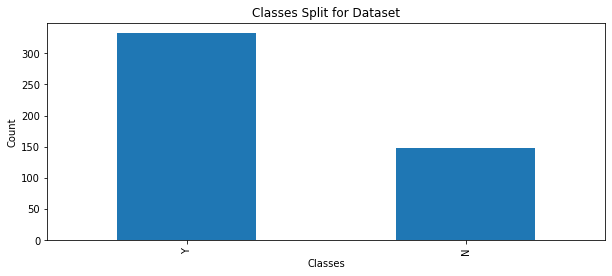

In [64]:
#Class Balance for the target variable
print('Class Split')
print(data1['Loan_Status'].value_counts())
data1['Loan_Status'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

Y has 332 (69%) and N has 148 (31%) only. Classes are not balanced. Need to adjust the weights in model to handle this unbalance

In [69]:
# Dropping loan_id column, since it is just a identifier not contributing to the decision
data2 = data1.drop(columns = ['Loan_ID'], axis = 1)

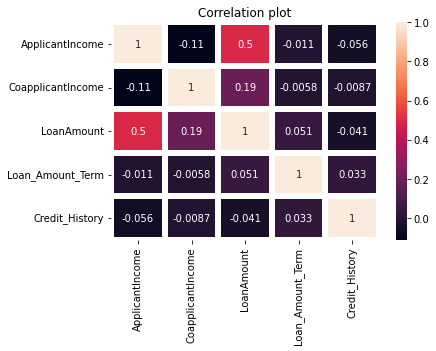

In [70]:
#Checking correlation
corr_plot = sns.heatmap(data2.corr(),annot = True,linewidths=5 )
plt.title("Correlation plot")
plt.show()

No high collineraity between the numeric variables. The highest correlation is between the applicant income and loan amount, which is 50%

In [72]:
# Creating dummy values for the data and drop first column along the way
# example => Dummies Created ('female','male') => Dropped 'female' columns

# Creating two empty arrays of object type and int type

obj_type, int64_type = [], [] 
column_names = data2.columns                     # Taking out column names of data 
type_arr = data2.dtypes                          # Taking out dtypes of data
for i in column_names:
    if type_arr[i] == 'int64':                # if datatype of column == int, append into int_type array
        int64_type.append(i)
    if type_arr[i] == 'object':               # Similar to Object type array
        obj_type.append(i)

for i in obj_type:
    name = pd.get_dummies(data2[i], drop_first = True)

    # joining both the datasets
    frames = [data2, name]
    
    #adding new dummy values to data fram
    data2 = pd.concat(frames,axis = 1)
    #dropping original column
    data2 = data2.drop(columns = [i], axis = 1)

In [73]:
data2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban,Y
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [75]:
#Function to check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(data2)

,variables,VIF
0,ApplicantIncome,2.773727
1,CoapplicantIncome,1.556168
2,LoanAmount,6.456961
3,Loan_Amount_Term,11.137195
4,Credit_History,8.970683
5,Male,6.215529
6,Yes,3.896158
7,1,1.449285
8,2,1.523285
9,3+,1.286744


In [76]:
#Removing term column as they are heavy VIF
data3 = data2.drop('Loan_Amount_Term',axis=1)
calc_vif(data3)

,variables,VIF
0,ApplicantIncome,2.772963
1,CoapplicantIncome,1.556167
2,LoanAmount,5.779031
3,Credit_History,7.417993
4,Male,5.674800
5,Yes,3.896078
6,1,1.445729
7,2,1.522018
8,3+,1.285732
9,Not Graduate,1.261929


In [78]:
#Create x and y variables
X = data3.drop('Y',axis=1).to_numpy()
y = data3['Y'].to_numpy()

In [83]:
#Create Train and Test datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.25,random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(360, 13) (360,)
(120, 13) (120,)


In [84]:
#fEATURE SCALING AS VARIABLES ARE OF DIFFERENT SCALES
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [121]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0, class_weight={0:0.31,1:0.69})
logr.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.31, 1: 0.69}, random_state=0)

In [122]:
#Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = logr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred)) 


[[14 23]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      0.38      0.55        37
           1       0.78      1.00      0.88        83

    accuracy                           0.81       120
   macro avg       0.89      0.69      0.71       120
weighted avg       0.85      0.81      0.78       120



81% accuracy for the logistic regression model


k = 1 , score= 0.71
k = 2 , score= 0.66
k = 3 , score= 0.78
k = 4 , score= 0.76
k = 5 , score= 0.8
k = 6 , score= 0.78
k = 7 , score= 0.8
k = 8 , score= 0.79
k = 9 , score= 0.8
k = 10 , score= 0.79
k = 11 , score= 0.79
k = 12 , score= 0.79
k = 13 , score= 0.8
k = 14 , score= 0.79
k = 15 , score= 0.78
k = 16 , score= 0.79
k = 17 , score= 0.78
k = 18 , score= 0.78
k = 19 , score= 0.77


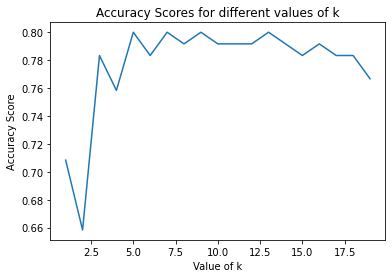

In [97]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = list(range(1,20))
scores = []

# model fitting and calculating accuracy score
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print('k =',k,', score=', round(knn.score(X_test, y_test),2))

plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

Choose k of 13 as its has maximum score and close to the general rule of square root of observations

In [103]:
#Final knn model
knnf = KNeighborsClassifier(n_neighbors=13)
knnf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [104]:
#Confusion matrix
y_pred = knnf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred)) 

[[13 24]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      0.35      0.52        37
           1       0.78      1.00      0.87        83

    accuracy                           0.80       120
   macro avg       0.89      0.68      0.70       120
weighted avg       0.84      0.80      0.76       120



80% accuracy for the model

In [106]:
#SVM Model
from sklearn.svm import SVC
svm = SVC(kernel='linear',random_state=0)
svm.fit(X_train, y_train)


SVC(kernel='linear', random_state=0)

In [107]:
#Confusion matrix
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred)) 

[[15 22]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      0.41      0.58        37
           1       0.79      1.00      0.88        83

    accuracy                           0.82       120
   macro avg       0.90      0.70      0.73       120
weighted avg       0.86      0.82      0.79       120



82% Accuracy for the svm model

SVM got the better accuracy score compared to the 3 different models

In [110]:
#Function for roc curve
def roccurve (model):    
    ypred = model.predict(X_test)    
    #Transform the variables into binary (0,1) - ROC Curve
    from sklearn import preprocessing
    Forecast1=pd.DataFrame(ypred)
    Outcome1=pd.DataFrame(y_test)
    lb1 = preprocessing.LabelBinarizer()
    OutcomeB1 =lb1.fit_transform(Outcome1)
    ForecastB1 = lb1.fit_transform(Forecast1)
    
    #Setup the ROC Curve
    from sklearn.metrics import roc_curve, auc
    from sklearn import metrics
    fpr, tpr, threshold = metrics.roc_curve(OutcomeB1, ForecastB1)
    roc_auc = metrics.auc(fpr, tpr)
    print('ROC Curve', model)
    #Plot the ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()  

ROC Curve LogisticRegression(random_state=0)


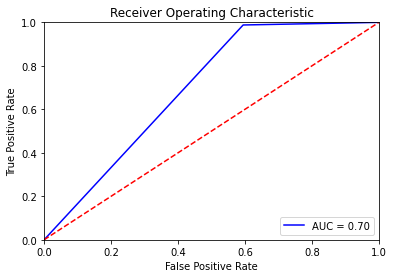

ROC Curve KNeighborsClassifier(n_neighbors=13)


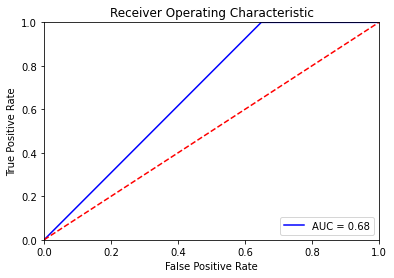

ROC Curve SVC(kernel='linear', random_state=0)


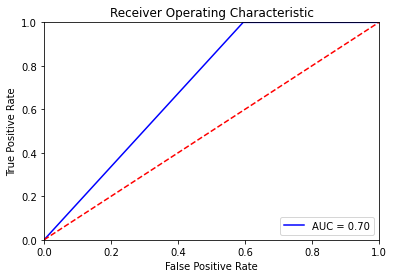

In [112]:
roccurve(logr)
roccurve(knnf)
roccurve(svm)

SVM and Logistic Regression have higher ROC

SVM and Logistic Regression have higher ROC, but SVM has better accuracy, so SVM will be chosen as the selected model